# **Machine Learning para Procesamiento de Datos Médicos**
---
## Taller Pre-Congreso CNIB 2025
---
<table>
  <tr>
      <h4><b>ISC. Gabriel Carcedo Rodríguez</b> (<i>PCIC - IIMAS, UNAM</i>): <a href= "mailto:gabrielcarcedo@comunidad.unam.mx">gabrielcarcedo@comunidad.unam.mx</a>
      <br>
      <br>
      <b>Ing. Ismael Pérez Ruiz</b> (<i>Universidad Modelo</i>): <a href= "mailto:CORREO">iperez@modelo.edu.mx</a>
      <br>
      <br>
      <b>LCC. Victoria May Balam</b> (<i>PCIC - IIMAS, UNAM</i>): <a href= "mailto:victoria.mbalam@comunidad.unam.mx">victoria.mbalam@comunidad.unam.mx</a> </h4>
  </tr>
  <tr>
    <td width="60%" valign="top">
      <!-- Content for Column 1 -->
      <br>
      <br>
      <a href="https://www.pcic.unam.mx/">Posgrado en Ciencia e Ingeniería de la Computación</a>
    </td>
    <td width="40%" valign="top" style="text-align: center;">
      <!-- Content for Column 2 -->
      <a href="https://www.pcic.unam.mx/">
        <img src="https://pcic.posgrado.unam.mx/wp-content/uploads/Ciencia-e-Ingenieria-de-la-Computacion_color.png" alt="PCIC" style="width:100%; height:auto;">
      </a>
    </td>
  </tr>
  <tr>
    <td width="60%" valign="top">
      <!-- Content for Column 1 -->
      <br>
      <br>
      <a href="https://www.unimodelo.edu.mx/merida">Universidad Modelo</a>
    </td>
    <td width="40%" valign="top" style="text-align: center;">
      <!-- Content for Column 2 -->
      <a href="https://www.unimodelo.edu.mx/merida">
        <img src="https://servicios.unimodelo.edu.mx/merida/ing/practicas/resources/imgs/logo-modelo.png" alt="Universidad Modelo" style="width:100%; height:auto;">
      </a>
    </td>
  </tr>

</table>


# Paqueterías y Librerías 📦📚

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Dataset 📑: **Generaremos un dataset artificial para probar los métodos**

Este dataset simula un ensayo clínico en algunos pacientes, dando información como su edad, la dosis diaria que toma de un medicamento, el estado de sus riñones y si tuvo efectos secundarios o no. El chiste es que al final, los modelos puedan predecir con exactitud si un paciente nuevo, cuyos datos no se conocen, presentará efectos secundarios.

In [2]:
data = {
    'Edad_Paciente': [
        58, 79, 73, 58, 38, 58, 81, 74, 39, 84, 51, 62, 48, 48, 43, 61, 41, 74,
        71, 74, 58, 20, 29, 61, 81, 71, 38, 26, 43, 61, 71, 81, 38, 71, 51, 61,
        38, 62, 53, 51, 58, 61, 38, 20, 81, 62, 43, 61, 29, 39
    ],
    'Dosis_Diaria_mg': [
        80, 50, 80, 20, 50, 20, 80, 50, 80, 80, 80, 50, 50, 80, 80, 20, 50, 50,
        50, 50, 20, 80, 50, 50, 80, 80, 50, 50, 20, 80, 20, 20, 20, 50, 80, 80,
        80, 20, 50, 80, 80, 80, 80, 50, 50, 50, 50, 20, 20, 20
    ],
    'Funcion_Renal_Pct': [
        93, 83, 94, 61, 63, 83, 72, 72, 79, 94, 99, 98, 77, 69, 75, 78, 93, 73,
        64, 97, 61, 93, 85, 96, 75, 84, 86, 70, 78, 62, 91, 69, 89, 87, 89, 79,
        98, 95, 69, 92, 83, 91, 92, 63, 66, 60, 69, 83, 66, 91
    ],
    'Tuvo_Efecto_Secundario': [
        0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
        1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
        1, 0
    ]
}
df_farmaco = pd.DataFrame(data)

In [ ]:


df_farmaco

,Edad_Paciente,Dosis_Diaria_mg,Funcion_Renal_Pct,Tuvo_Efecto_Secundario
0,58,80,93,0
1,79,50,83,1
2,73,80,94,0
3,58,20,61,1
4,38,50,63,1
5,58,20,83,0
6,81,80,72,1
7,74,50,72,1
8,39,80,79,0
9,84,80,94,0


# **Exploratory Data Analysis (EDA):**

In [3]:
df_farmaco.columns

Index(['Edad_Paciente', 'Dosis_Diaria_mg', 'Funcion_Renal_Pct',
       'Tuvo_Efecto_Secundario'],
      dtype='object')

In [4]:
df_farmaco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Edad_Paciente           50 non-null     int64
 1   Dosis_Diaria_mg         50 non-null     int64
 2   Funcion_Renal_Pct       50 non-null     int64
 3   Tuvo_Efecto_Secundario  50 non-null     int64
dtypes: int64(4)
memory usage: 1.7 KB


In [5]:
df_farmaco.describe()

,Edad_Paciente,Dosis_Diaria_mg,Funcion_Renal_Pct,Tuvo_Efecto_Secundario
count,50.000000,50.000000,50.000000,50.000000
mean,55.440000,54.200000,80.580000,0.380000
std,17.100137,23.481647,12.069679,0.490314
min,20.000000,20.000000,60.000000,0.000000
25%,41.500000,50.000000,69.250000,0.000000
50%,58.000000,50.000000,83.000000,0.000000
75%,71.000000,80.000000,91.750000,1.000000
max,84.000000,80.000000,99.000000,1.000000


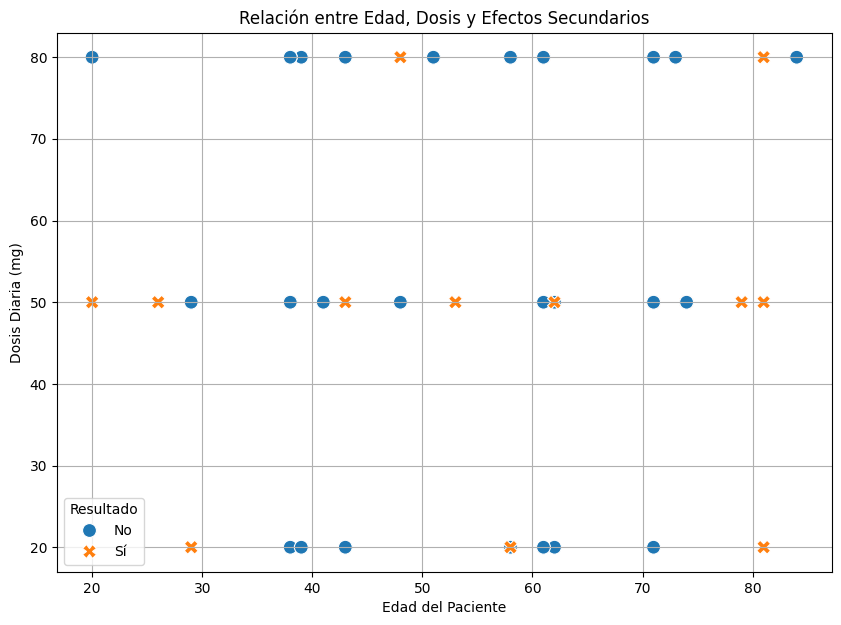

In [10]:
# Creamos una columna  para tener etiquetas de texto claras ('Sí'/'No')
df_farmaco['Resultado'] = df_farmaco['Tuvo_Efecto_Secundario'].map({0: 'No', 1: 'Sí'})

plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_farmaco,
                x='Edad_Paciente',
                y='Dosis_Diaria_mg',
                hue='Resultado',
                style='Resultado',
                s=100)



plt.title('Relación entre Edad, Dosis y Efectos Secundarios')
plt.xlabel('Edad del Paciente')
plt.ylabel('Dosis Diaria (mg)')
plt.grid(True)
plt.show()


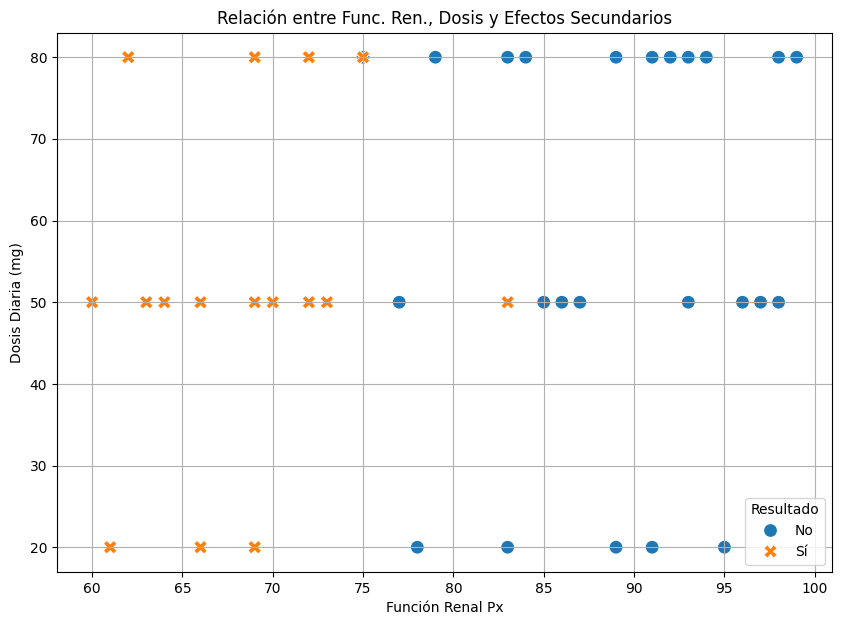

In [11]:
# 1. Creamos una columna temporal para tener etiquetas de texto claras ('Sí'/'No')
df_farmaco['Resultado'] = df_farmaco['Tuvo_Efecto_Secundario'].map({0: 'No', 1: 'Sí'})

# 2. Ahora usamos la nueva columna 'Resultado' para el color (hue) y el estilo (style)
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_farmaco,
                x='Funcion_Renal_Pct',
                y='Dosis_Diaria_mg',
                hue='Resultado',
                style='Resultado',
                s=100)



plt.title('Relación entre Func. Ren., Dosis y Efectos Secundarios')
plt.xlabel('Función Renal Px')
plt.ylabel('Dosis Diaria (mg)')
plt.grid(True)
plt.show()

# **Preparación de datos:**

In [13]:
X = df_farmaco[['Edad_Paciente', 'Dosis_Diaria_mg', 'Funcion_Renal_Pct']]
y = df_farmaco['Tuvo_Efecto_Secundario']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [14]:
print(y_test.size)

15


# **APLICACIÓN DE LOS MÉTODOS:**


#SVM (Máquinas de soporte vectorial)



In [18]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

In [31]:
# Este paso es muy recomendado para algoritmos basados en distancia como KNN
print("\nEscalando los datos...")
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Datos escalados.")


Escalando los datos...
Datos escalados.


In [45]:

modelo_svm = SVC(kernel='linear', C=0.3)

print("\nEntrenando el modelo SVM...")
# Entrenamos el modelo con los MISMOS datos escalados que usamos para KNN
modelo_svm.fit(X_train_scaled, y_train)
print("¡Entrenamiento completado!\n")


Entrenando el modelo SVM...
¡Entrenamiento completado!




Generando visualización del modelo original usando PCA como 'lente' 2D...


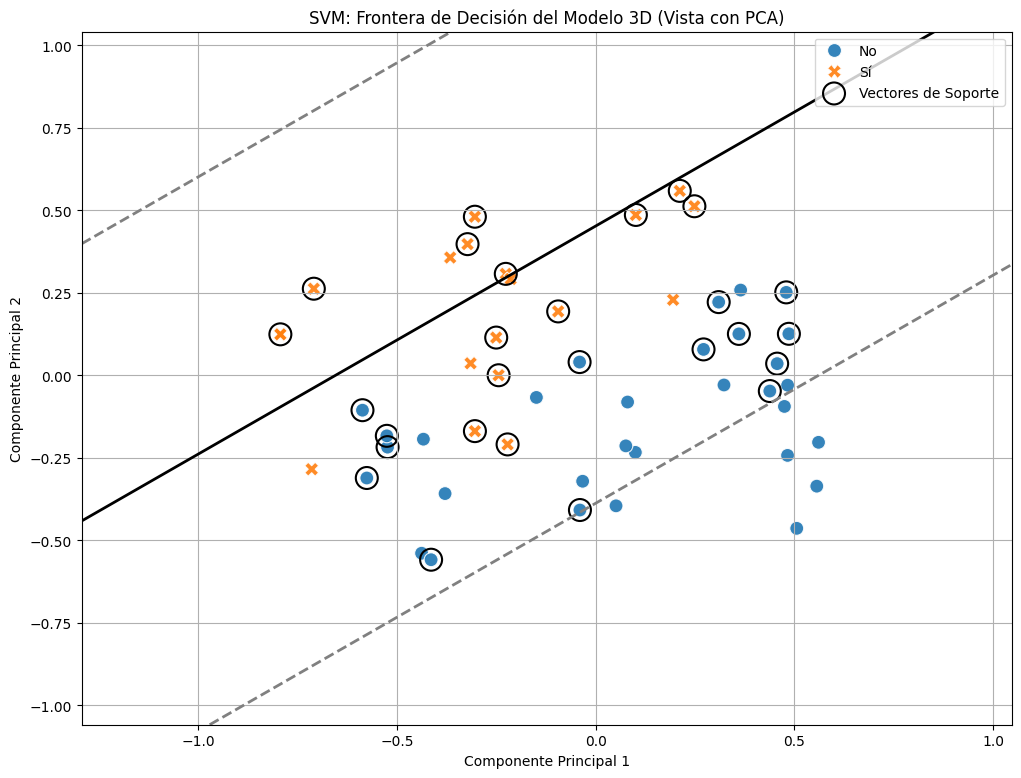

In [46]:
# VISUALIZAR LA FRONTERA DEL MODELO 3D USANDO PCA
import numpy as np
from sklearn.decomposition import PCA # Asegúrate de tener esta importación

print("\nGenerando visualización del modelo original usando PCA como 'lente' 2D...")

# 1. Ajustamos PCA con los datos de entrenamiento escalados para encontrar la mejor "vista" 2D
pca = PCA(n_components=2, random_state=42)
# Usamos los datos escalados del Paso 5
pca.fit(X_train_scaled)

# --- Preparamos la malla para graficar la frontera en el espacio PCA ---
# Transformamos todos los datos (no solo el de entrenamiento) al espacio PCA para saber los límites
X_scaled = scaler.transform(X) # 'scaler' es el MinMaxScaler que definiste antes
X_pca = pca.transform(X_scaled)

x_min, x_max = X_pca[:, 0].min() - 0.5, X_pca[:, 0].max() + 0.5
y_min, y_max = X_pca[:, 1].min() - 0.5, X_pca[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# 2. El paso clave: proyectamos la malla 2D de vuelta al espacio 3D original
# para poder consultarle a nuestro modelo SVM original.
mesh_points_pca = np.c_[xx.ravel(), yy.ravel()]
mesh_points_3d_scaled = pca.inverse_transform(mesh_points_pca)

# 3. Usamos el modelo YA ENTRENADO ('modelo_svm') para obtener la frontera de decisión
Z = modelo_svm.decision_function(mesh_points_3d_scaled).reshape(xx.shape)


# --- Graficar los resultados ---
plt.figure(figsize=(12, 9))

# Dibujamos el hiperplano y los márgenes en el espacio PCA
plt.contour(xx, yy, Z, colors=['gray', 'black', 'gray'], levels=[-1, 0, 1],
            linestyles=['--', '-', '--'], linewidths=2)

# Graficamos los datos de los pacientes transformados a 2D
# Creamos un DataFrame temporal para graficar fácilmente
df_pca = pd.DataFrame(data=X_pca, columns=['Componente Principal 1', 'Componente Principal 2'])
df_pca['Resultado'] = df_farmaco['Resultado'].values

sns.scatterplot(data=df_pca,
                x='Componente Principal 1',
                y='Componente Principal 2',
                hue='Resultado',
                style='Resultado',
                s=100,
                alpha=0.9)

# Transformamos los vectores de soporte originales al espacio PCA para dibujarlos
support_vectors_pca = pca.transform(modelo_svm.support_vectors_)
plt.scatter(support_vectors_pca[:, 0], support_vectors_pca[:, 1],
            s=250, facecolors='none', edgecolors='black', linewidth=1.5,
            label='Vectores de Soporte')

plt.title('SVM: Frontera de Decisión del Modelo 3D (Vista con PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.grid(True)
plt.show()

In [49]:
# --- Evaluación del SVM ---
# Hacemos predicciones con los datos de prueba escalados
predicciones_svm = modelo_svm.predict(X_test_scaled)
precision_svm = accuracy_score(y_test, predicciones_svm)
print(f"La precisión del modelo SVM en los datos de prueba es: {precision_svm * 100:.2f}%")


La precisión del modelo SVM en los datos de prueba es: 80.00%



Generando la Matriz de Confusión para el SVM...


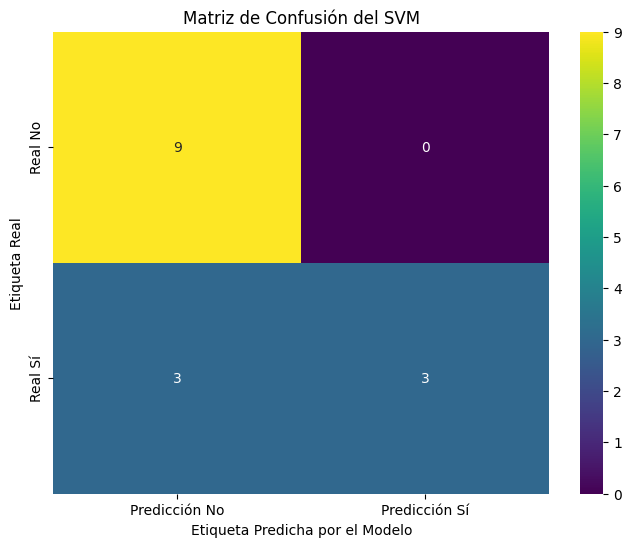

In [50]:
from sklearn.metrics import accuracy_score, confusion_matrix
# --- Matriz de Confusión del SVM ---
print("\nGenerando la Matriz de Confusión para el SVM...")
cm_svm = confusion_matrix(y_test, predicciones_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='viridis', # Usé otro color para diferenciar
            xticklabels=['Predicción No', 'Predicción Sí'],
            yticklabels=['Real No', 'Real Sí'])

plt.ylabel('Etiqueta Real')
plt.xlabel('Etiqueta Predicha por el Modelo')
plt.title('Matriz de Confusión del SVM')
plt.show()

#Árbol de decisión

In [ ]:
arbol_farmaco = DecisionTreeClassifier(criterion= 'entropy', max_depth=2)
print("\nEntrenando el modelo de Árbol de Decisión...")
arbol_farmaco.fit(X_train, y_train)
print("¡Entrenamiento completado!\n")


Entrenando el modelo de Árbol de Decisión...
¡Entrenamiento completado!



In [ ]:
predicciones = arbol_farmaco.predict(X_test)
precision = accuracy_score(y_test, predicciones)
print(f"La precisión del modelo en los datos de prueba es: {precision * 100:.2f}%")


La precisión del modelo en los datos de prueba es: 100.00%


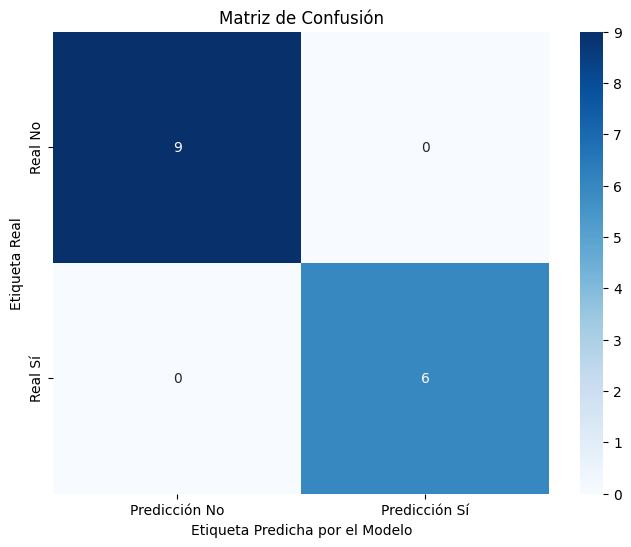

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
cm = confusion_matrix(y_test, predicciones)
plt.figure(figsize=(8, 6))
sns.heatmap(cm,
            annot=True, # Muestra los números en cada celda
            fmt='d', # Formatea los números como enteros
            cmap='Blues', # Paleta de colores
            xticklabels=['Predicción No', 'Predicción Sí'],
            yticklabels=['Real No', 'Real Sí'])

plt.ylabel('Etiqueta Real')
plt.xlabel('Etiqueta Predicha por el Modelo')
plt.title('Matriz de Confusión')
plt.show()


Generando la visualización del árbol de factores de riesgo...


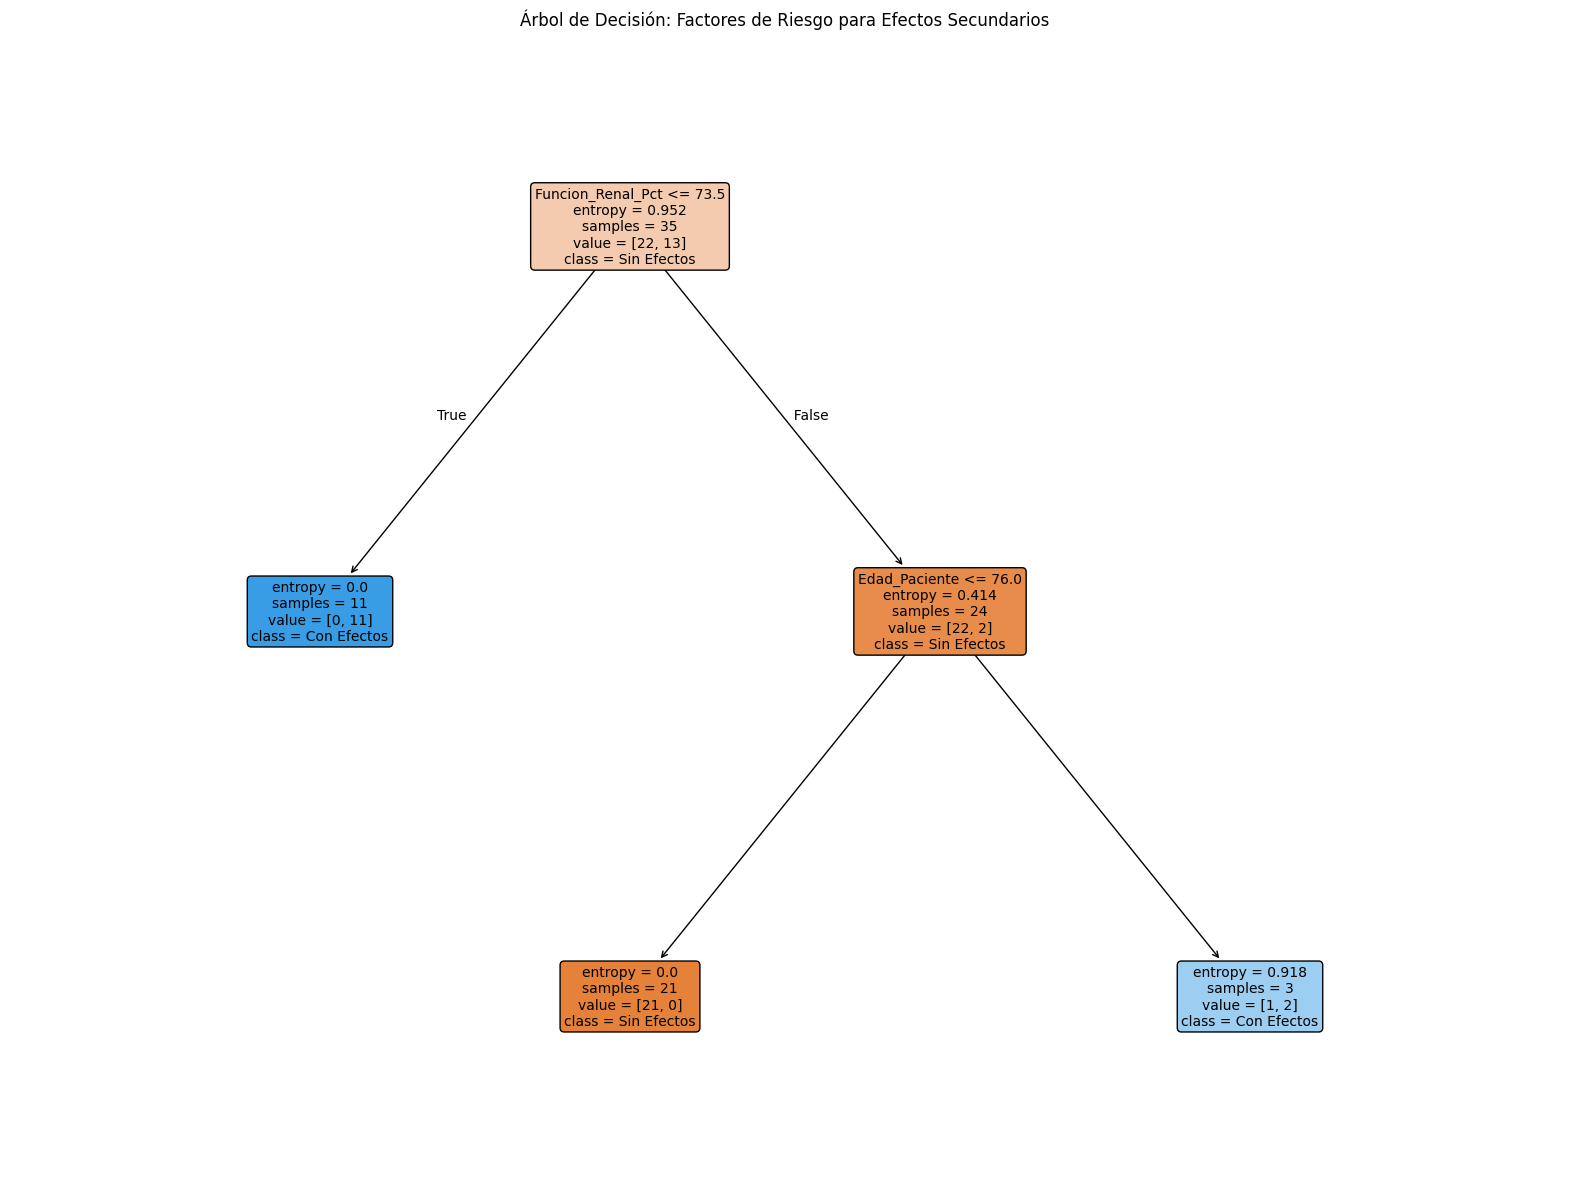

In [ ]:
print("\nGenerando la visualización del árbol de factores de riesgo...")
plt.figure(figsize=(20, 15))
plot_tree(arbol_farmaco,
          feature_names=X.columns,
          class_names=['Sin Efectos', 'Con Efectos'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Árbol de Decisión: Factores de Riesgo para Efectos Secundarios")
plt.show()


# Random Forest (Bosques aleatorios)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# n_estimators=100 significa que nuestro "bosque" tendrá 100 árboles de decisión.
modelo_rf = RandomForestClassifier(n_estimators=100, criterion='gini') # <-- CAMBIO AQUÍ

print("\nEntrenando el modelo de Random Forest...")
modelo_rf.fit(X_train, y_train)
print("¡Entrenamiento completado!\n")


Entrenando el modelo de Random Forest...
¡Entrenamiento completado!



In [ ]:
predicciones = modelo_rf.predict(X_test) # Usamos el nuevo modelo
precision = accuracy_score(y_test, predicciones)
print(f"La precisión del modelo Random Forest en los datos de prueba es: {precision * 100:.2f}%")


La precisión del modelo Random Forest en los datos de prueba es: 100.00%



Generando la Matriz de Confusión...


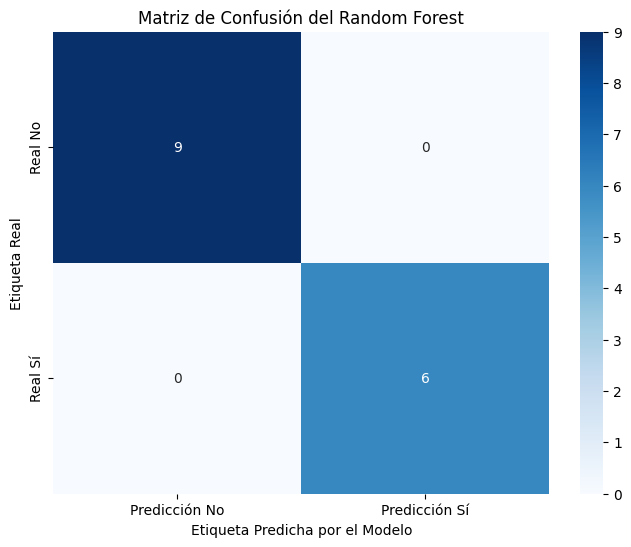

In [ ]:
print("\nGenerando la Matriz de Confusión...")
cm = confusion_matrix(y_test, predicciones)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicción No', 'Predicción Sí'],
            yticklabels=['Real No', 'Real Sí'])
plt.ylabel('Etiqueta Real')
plt.xlabel('Etiqueta Predicha por el Modelo')
plt.title('Matriz de Confusión del Random Forest')
plt.show()



Calculando la importancia de cada característica en el modelo...


/tmp/ipython-input-2218513657.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importancia', y='Característica', data=df_importancias, palette='viridis')


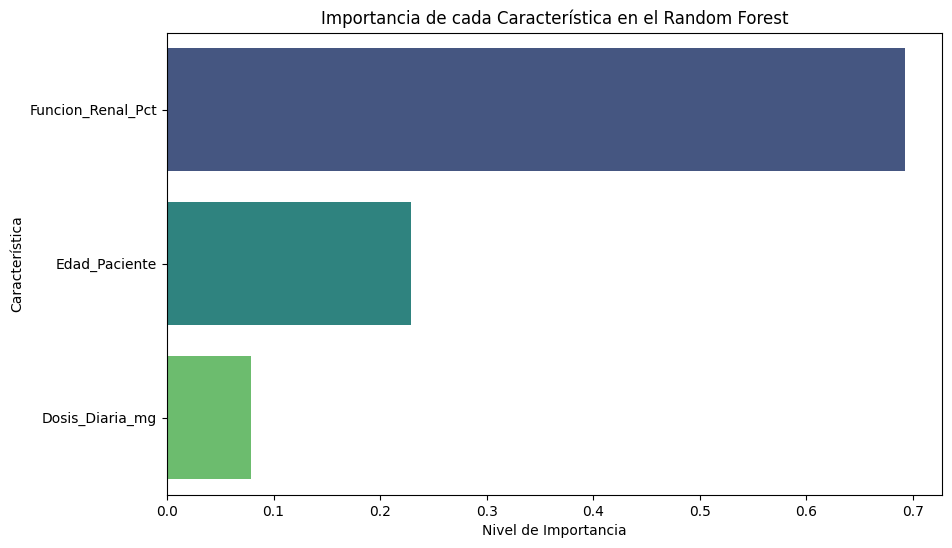

In [ ]:
print("\nCalculando la importancia de cada característica en el modelo...")

# El modelo ya entrenado guarda la importancia de cada característica
importancias = modelo_rf.feature_importances_
nombres_caracteristicas = X.columns

# Creamos un DataFrame para visualizarlo fácilmente
df_importancias = pd.DataFrame({'Característica': nombres_caracteristicas, 'Importancia': importancias})

# Ordenamos el DataFrame para que la característica más importante quede arriba
df_importancias = df_importancias.sort_values(by='Importancia', ascending=False)

# --- Graficamos los resultados ---
plt.figure(figsize=(10, 6))
sns.barplot(x='Importancia', y='Característica', data=df_importancias, palette='viridis')

plt.title('Importancia de cada Característica en el Random Forest')
plt.xlabel('Nivel de Importancia')
plt.ylabel('Característica')
plt.show()



# KNN


In [ ]:
from sklearn.neighbors import KNeighborsClassifier # <-- CAMBIO AQUÍ
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Este paso es muy recomendado para algoritmos basados en distancia como KNN
print("\nEscalando los datos...")
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Datos escalados.")


Escalando los datos...
Datos escalados.


In [ ]:
pd.DataFrame(X_train_scaled)

,0,1,2
0,0.953125,1.0,0.289474
1,0.640625,1.0,0.789474
2,0.359375,0.5,0.210526
3,0.640625,0.0,0.578947
4,0.640625,0.0,0.447368
5,1.000000,1.0,0.868421
6,0.328125,0.5,0.842105
7,0.953125,1.0,0.368421
8,0.484375,1.0,0.736842
9,0.953125,0.0,0.210526


In [ ]:
# n_neighbors=5 significa que el modelo considerará a los 5 vecinos más cercanos para votar.
modelo_knn = KNeighborsClassifier(n_neighbors=3)#PRUEBA QUE SUCEEDE CAMBIANDO EL NUMERO DE VECINOS

print("\nEntrenando el modelo KNN...")
# Importante: Entrenamos el modelo con los datos YA ESCALADOS
modelo_knn.fit(X_train_scaled, y_train)
print("¡Entrenamiento completado!\n")


Entrenando el modelo KNN...
¡Entrenamiento completado!



La precisión del modelo KNN en los datos de prueba es: 93.33%

Generando la Matriz de Confusión...


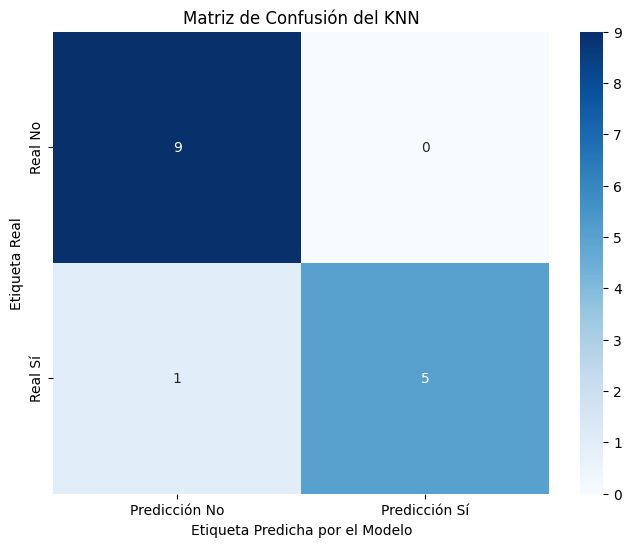

In [ ]:
# Importante: Hacemos predicciones con los datos de prueba TAMBIÉN ESCALADOS
predicciones = modelo_knn.predict(X_test_scaled)
precision = accuracy_score(y_test, predicciones)
print(f"La precisión del modelo KNN en los datos de prueba es: {precision * 100:.2f}%")

print("\nGenerando la Matriz de Confusión...")
cm = confusion_matrix(y_test, predicciones)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicción No', 'Predicción Sí'],
            yticklabels=['Real No', 'Real Sí'])
plt.ylabel('Etiqueta Real')
plt.xlabel('Etiqueta Predicha por el Modelo')
plt.title('Matriz de Confusión del KNN')
plt.show()

# Gaussian Naive Bayesian


Generando histogramas por clase para ver la distribución de los datos...


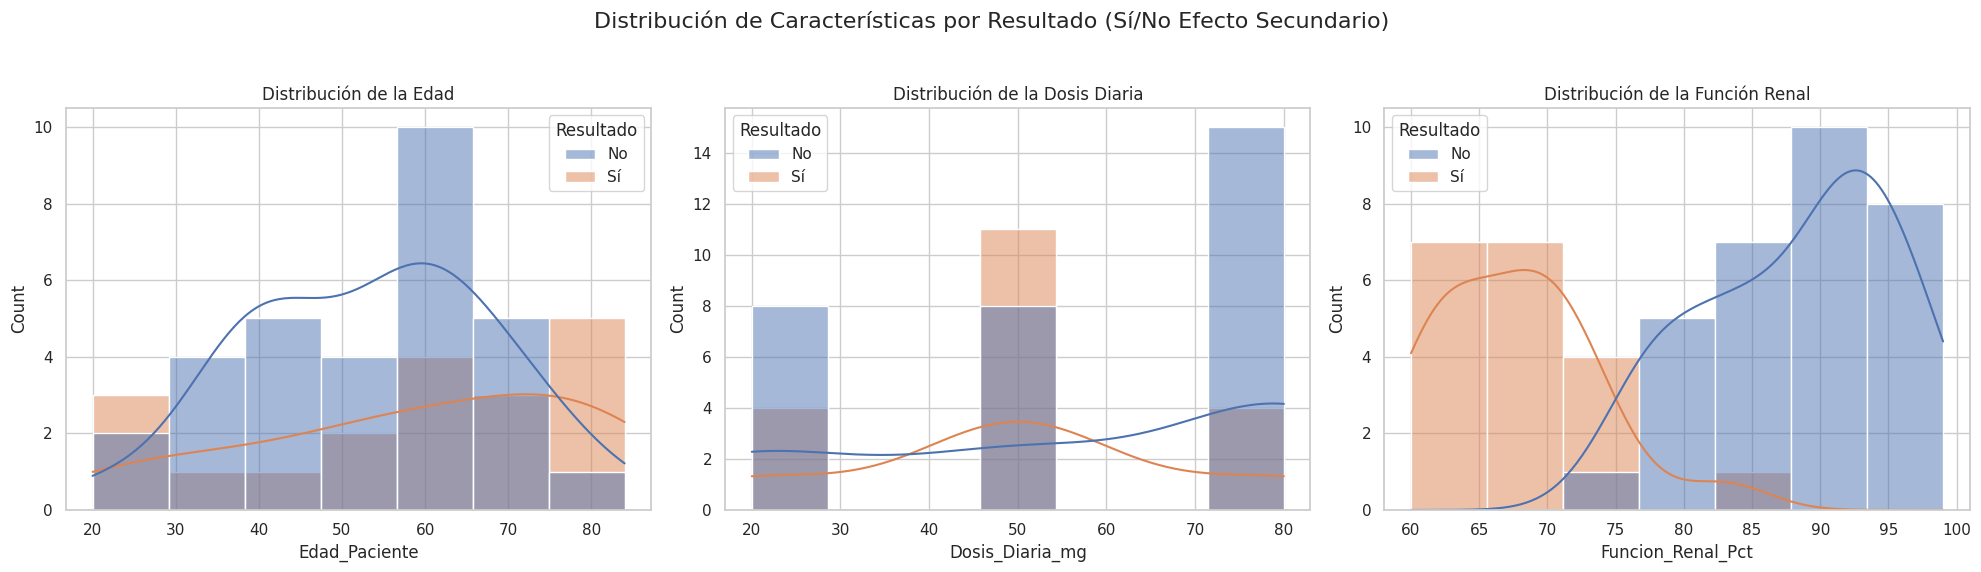

In [52]:
# --- VISUALIZA LA DISTRIBUCIÓN DE CADA CARACTERÍSTICA POR CLASE ---
print("\nGenerando histogramas por clase para ver la distribución de los datos...")

# Configuramos el estilo de las gráficas
sns.set(style="whitegrid")

# Creamos una figura que contendrá nuestros 3 histogramas
fig, axes = plt.subplots(1, 3, figsize=(20, 6)) # Hice la figura un poco más ancha
fig.suptitle('Distribución de Características por Resultado (Sí/No Efecto Secundario)', fontsize=16)

# Histograma para la Edad del Paciente, separado por 'Resultado'
sns.histplot(data=df_farmaco, x='Edad_Paciente', hue='Resultado', kde=True, ax=axes[0])
axes[0].set_title('Distribución de la Edad')

# Histograma para la Dosis Diaria, separado por 'Resultado'
sns.histplot(data=df_farmaco, x='Dosis_Diaria_mg', hue='Resultado', kde=True, ax=axes[1])
axes[1].set_title('Distribución de la Dosis Diaria')

# Histograma para la Función Renal, separado por 'Resultado'
sns.histplot(data=df_farmaco, x='Funcion_Renal_Pct', hue='Resultado', kde=True, ax=axes[2])
axes[2].set_title('Distribución de la Función Renal')

# Mostramos las gráficas
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Ajuste para que el título principal no se solape
plt.show()

In [53]:
from sklearn.naive_bayes import GaussianNB # <-- Importamos el modelo

print("\n--- Entrenando un nuevo modelo: Gaussian Naive Bayes ---")

# Creamos una instancia del modelo
modelo_gnb = GaussianNB()

# Entrenamos el modelo con los datos originales (no es necesario escalarlos para este algoritmo)
# Usamos X_train y y_train del PASO 4
modelo_gnb.fit(X_train, y_train)

print("¡Entrenamiento del modelo Gaussian NB completado!\n")


--- Entrenando un nuevo modelo: Gaussian Naive Bayes ---
¡Entrenamiento del modelo Gaussian NB completado!



In [55]:
# EVALUACION DEL MODELO
print("Evaluando el modelo Gaussian NB...")

# Realizamos predicciones en el conjunto de prueba (X_test)
predicciones_gnb = modelo_gnb.predict(X_test)

# Calculamos la precisión del modelo
precision_gnb = accuracy_score(y_test, predicciones_gnb)
print(f"La precisión del modelo Gaussian NB en los datos de prueba es: {precision_gnb * 100:.2f}%")

Evaluando el modelo Gaussian NB...
La precisión del modelo Gaussian NB en los datos de prueba es: 100.00%



Generando la Matriz de Confusión para el modelo Gaussian NB...


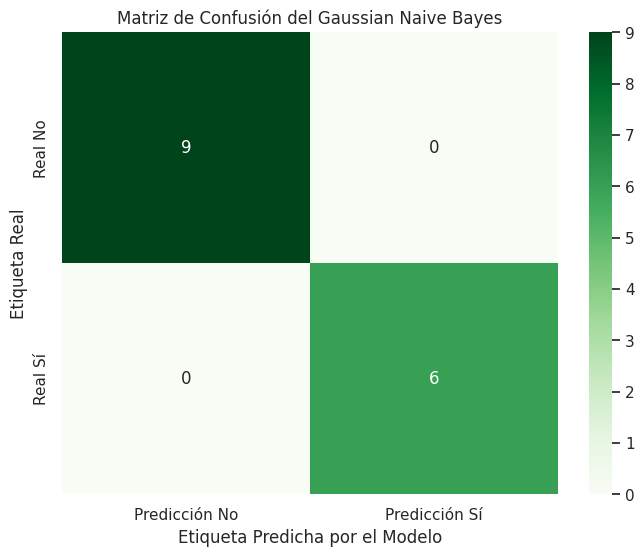

In [56]:
print("\nGenerando la Matriz de Confusión para el modelo Gaussian NB...")
cm_gnb = confusion_matrix(y_test, predicciones_gnb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_gnb, annot=True, fmt='d', cmap='Greens', # Usamos otro color para diferenciar
            xticklabels=['Predicción No', 'Predicción Sí'],
            yticklabels=['Real No', 'Real Sí'])
plt.ylabel('Etiqueta Real')
plt.xlabel('Etiqueta Predicha por el Modelo')
plt.title('Matriz de Confusión del Gaussian Naive Bayes')
plt.show()

#Redes Neuronales

In [57]:
from sklearn.neural_network import MLPClassifier # <-- Importamos el clasificador

print("\n--- Entrenando un nuevo modelo: Red Neuronal (MLP) ---")

# Creamos el modelo de Red Neuronal.
# - hidden_layer_sizes=(10, 5): Define la arquitectura. Dos capas ocultas,
#   la primera con 10 neuronas y la segunda con 5.
# - max_iter=1000: Aumentamos las iteraciones para asegurar que el modelo converja.
# - random_state=42: Para obtener resultados consistentes cada vez que se ejecute.
modelo_red_neuronal = MLPClassifier(hidden_layer_sizes=(10, 5),
                                    max_iter=1000,
                                    random_state=42)

# Entrenamos el modelo con los datos escalados (muy importante para las redes neuronales)
modelo_red_neuronal.fit(X_train_scaled, y_train)

print("¡Entrenamiento de la Red Neuronal completado!\n")


--- Entrenando un nuevo modelo: Red Neuronal (MLP) ---
¡Entrenamiento de la Red Neuronal completado!



In [58]:
# Hacemos predicciones con los datos de prueba escalados
predicciones_nn = modelo_red_neuronal.predict(X_test_scaled)

# Calculamos la precisión del modelo
precision_nn = accuracy_score(y_test, predicciones_nn)
print(f"La precisión de la Red Neuronal en los datos de prueba es: {precision_nn * 100:.2f}%")


La precisión de la Red Neuronal en los datos de prueba es: 100.00%



Generando la Matriz de Confusión para la Red Neuronal...


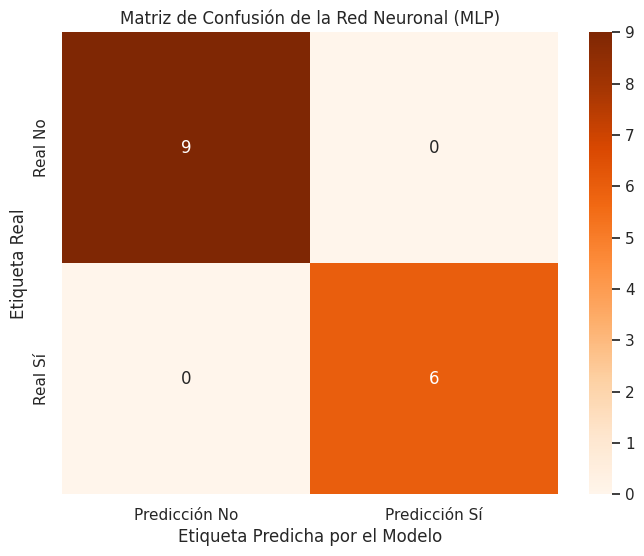

In [59]:
# Generamos y mostramos la Matriz de Confusión
print("\nGenerando la Matriz de Confusión para la Red Neuronal...")
cm_nn = confusion_matrix(y_test, predicciones_nn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Oranges', # Usamos otro color
            xticklabels=['Predicción No', 'Predicción Sí'],
            yticklabels=['Real No', 'Real Sí'])
plt.ylabel('Etiqueta Real')
plt.xlabel('Etiqueta Predicha por el Modelo')
plt.title('Matriz de Confusión de la Red Neuronal (MLP)')
plt.show()